## K-최근접 이웃 회귀

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
cond = df['Species'] == 'Perch'
perch_data = df.loc[cond]
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


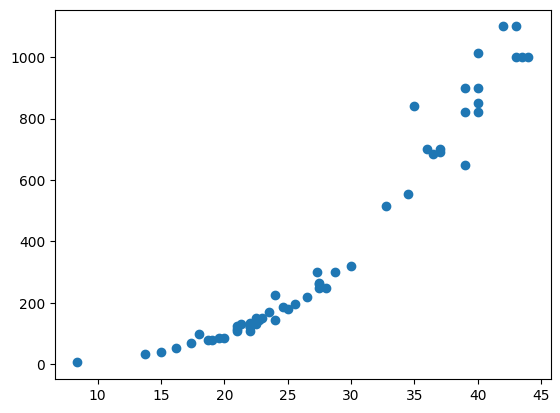

In [5]:
import matplotlib.pyplot as plt

plt.scatter(perch_data['Length2'], perch_data['Weight'])

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
train_input, test_input, train_target, test_target = train_test_split(perch_data[['Length2']], perch_data[['Weight']])

In [15]:
train_input.head()

,Length2
92,22.5
75,16.2
119,40.0
82,21.0
100,25.6


In [16]:
from sklearn.neighbors import KNeighborsRegressor # K-최근접 회귀 모델

In [17]:
knr = KNeighborsRegressor() # 2차원 데이터를 넣어야함
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [18]:
knr.score(test_input, test_target) # 결정계수, 정확도라 생각

0.9883315019722723

In [21]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)
# print(test_input, test_prediction)
# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

21.885714285714283

In [22]:
knr.score(train_input, train_target)

0.9735505756008329

In [33]:
knr.predict([[60]]) # 길이가 50이건 60이건 100이건 같은 무게가 나옴 => 3-2. 선형회귀

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[1004.]])

In [25]:
knr.n_neighbors = 3 # 수치 조정, 이웃의 개수 설정
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9809738085535169
0.9773818365717114


C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


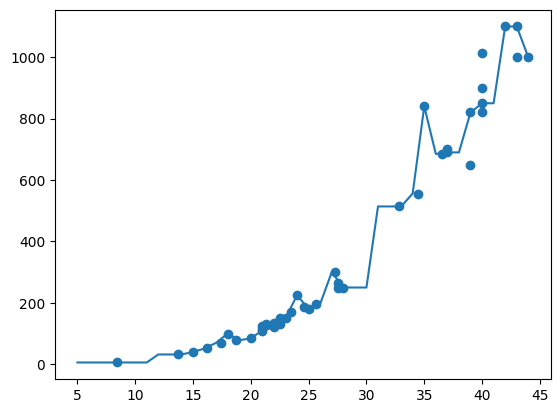

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


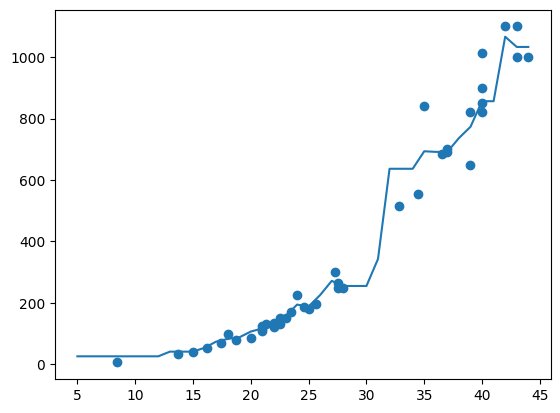

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


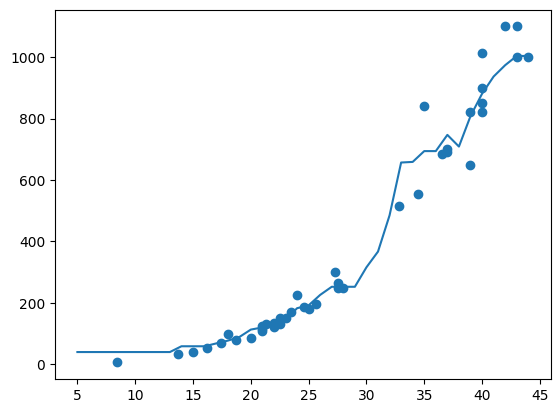

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


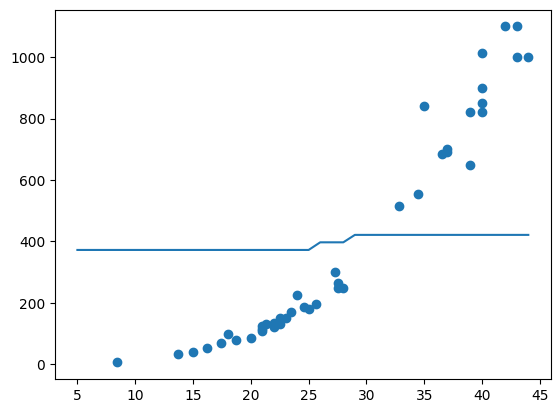

In [34]:
# 이웃의 개수가 n일 때 각각 비교
import numpy as np
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 3, 5, 40]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()